In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
import warnings
warnings.filterwarnings("ignore")
import sys  
sys.path.insert(0, '/home/jupyter/InternalVariability/AdaptationAnalysis')
from app.main.src.utils import *
import datetime

In [ ]:
mmle = MultiModelLargeEnsemble(models=['ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='tas', granularity='day', lat=41.3, lon=-72.5,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=False)
                              


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [11]:
mmle.hist

<xarray.Dataset>
Dimensions:    (member: 73, model: 7, time: 1140)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 64 65 66 67 68 69 70 71 72
    member_id  (model, member) object 1.0 2.0 3.0 4.0 5.0 ... nan nan nan nan
  * time       (time) datetime64[ns] 1920-01-01 1920-02-01 ... 2014-12-01
  * model      (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'
Data variables:
    tas        (model, member, time) float32 0.5224 0.7988 6.315 ... nan nan nan
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    intake_esm_dataset_key:    atm.20C.monthly
    ...                        ...
    logname:                   mudryk
    nco_openmp_thread_number:  1
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...

In [12]:
mmle.future

<xarray.Dataset>
Dimensions:    (member: 58, model: 7, time: 1032)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (model, member) object 1.0 2.0 3.0 4.0 5.0 ... nan nan nan nan
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2100-12-01
  * model      (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'
Data variables:
    tas        (model, member, time) float32 2.098 5.023 9.279 ... nan nan nan
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    intake_esm_dataset_key:    atm.20C.monthly
    ...                        ...
    logname:                   mudryk
    nco_openmp_thread_number:  1
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...

#### test internal var calc

In [13]:
#     def compute_internal_variability(self):
#         """Int Var calculation
#         TO_DO : ADD DOC STRING
#         """
#         dataset = xr.Dataset()
#         # get reference period 
#         data_ref = self.hist[self.variable]
#         data_ref = data_ref.sel(time=slice('1995','2014')).resample(time='AS').mean(dim='time')  
#         data_ref = data_ref.mean(dim=('time','model','member'))
#         dataset[self.variable+'_ref'] = data_ref.load()

#         # prepare temp data
#         data = self.future[self.variable]
#         data = data.transpose()    # need to transpose for polyfit, time needs to be first dimension
#         # resample yearly
#         data = data.resample(time='AS').mean(dim='time')
#         #decadal rolling average 
#         data = data.rolling(time=10, center=True).mean()   #dropna not working 
#         #implicit bias correction
#         if self.variable == 'tas':
#             data = (data-dataset[self.variable+'_ref'])
#         elif self.variable == 'pr':
#             data = (((data-dataset[self.variable+'_ref'])/dataset[self.variable+'_ref'])*100)      #percent change (not sure if this is right, getting weird results)
#         #load data
#         dataset[self.variable] = data.load()

#         # Internal var via LE method 
#         ensemble_mean = dataset[self.variable].mean('member')
#         dataset['model_le'] = ensemble_mean.var('model')
#         internal_le = dataset[self.variable].var('member')
#         dataset['internal_le'] = internal_le.mean(dim='model')
#         dataset['total_le'] = (dataset.internal_le + dataset.model_le)
#         dataset['internal_le_frac'] = ((dataset.internal_le/dataset.total_le)*100)
#         dataset['model_le_frac'] = ((dataset.model_le/dataset.total_le)*100)
#         dataset['total_direct_le'] = dataset[self.variable].var(dim=('model','member'))
#         # Internal var via FIT method
#         data_fit = dataset[self.variable].isel(member=0)  # select first ensemble member for the fit 
#         dataset['data_fit'] = data_fit.dropna(dim='time')   # drop nans, not sure why this only works here when you have two dimensions???
#         dataset['fit'] = self.polyfit(dataset.data_fit)
#         residual  = dataset.data_fit - dataset.fit
#         internal_fit = residual.var('time')
#         dataset['internal_fit'] = internal_fit.mean()
#         dataset['model_fit'] = dataset.fit.var('model')
#         dataset['total_fit'] = (dataset.internal_fit + dataset.model_fit)
#         dataset['internal_fit_frac'] = ((dataset.internal_fit/dataset.total_fit)*100)
#         dataset['model_fit_frac'] = ((dataset.model_fit/dataset.total_fit)*100)
#         dataset['total_direct_fit'] = dataset.data_fit.var('model')
 
#         return dataset

In [14]:
# test  = internal_variability(hist=mmle.hist,future=mmle.future)

#### Test internal variability calc

In [15]:
variable = 'tas'
# variable = 'pr'

In [16]:
dataset = xr.Dataset()

In [17]:
dataset

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [18]:
data_ref = mmle.hist[variable]

In [19]:
data_ref = data_ref.load()

In [22]:
dataset[variable+'_ref'] = data_ref.sel(time=slice('1995','2014')).resample(time='AS').mean(dim='time').mean(dim=('time','member'))

In [105]:
# get reference period 
dataset[variable+'_ref'] = data_ref.sel(time=slice('1995','2014')).resample(time='AS').mean(dim='time').mean(dim=('time','model','member'))
# data_ref = data_ref.tas - 273.15   # convert to celcius 
# data_ref = data_ref.mean(dim=('time','model','member'))
# dataset['tas_ref'] = data_ref

In [23]:
dataset

<xarray.Dataset>
Dimensions:  (model: 7)
Coordinates:
  * model    (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'
Data variables:
    tas_ref  (model) float32 14.47 13.41 15.39 11.56 13.56 12.73 7.736

In [30]:
data = mmle.future[variable]

In [31]:
data = data.load()

In [32]:
data = data.transpose()

In [33]:
data

<xarray.DataArray 'tas' (time: 1032, member: 58, model: 7)>
array([[[ 2.0976257 , -1.395813  ,  4.5300903 , ...,  6.249298  ,
         -2.091858  , -3.3912964 ],
        [ 1.6800232 ,  5.6094055 ,  5.0527344 , ...,  3.5032654 ,
          2.1196594 , -4.0103455 ],
        [ 0.26895142,  5.5926514 ,  8.078186  , ...,  0.31936646,
         -1.5163269 , -4.0386047 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 5.0227356 ,  1.1075134 ,  5.8829956 , ...,  5.032501  ,
          1.9114685 , -6.168457  ],
        [ 5.899872  ,  5.0986633 ,  6.9950867 , ...,  8.013977  ,
          3.0946655 , -8.754059  ],
        [ 5.915161  ,  1.2337952 ,  6.754608  , ...,  5.5500793 ,
         -2.1472778 , -7.806366  ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[12.511658  ,  8.859802  , 14.043457  , ...,  9.092682  ,
         11.847778  ,  4.697113  ],
        [ 8.968231  ,  7.1993103 , 15.65918   , ...,  9.2951355 ,
         10.329742  ,  2.811676  ],
        [ 8.314301  , 10.681427  , 14.439056  , ...,  8.825531  ,
          6.9241943 ,  1.2425537 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (member, model) object 1.0 'r4i1p1f1' 'r17i1p1f1' ... nan nan nan
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2100-12-01
  * model      (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'

In [34]:
 
# data = data.transpose()
# # resample yearly
data = data.resample(time='AS').mean(dim='time')
#decadal rolling average 
data = data.rolling(time=10, center=True).mean()   #dropna not working 
#implicit bias correction
# if variable == 'tas':
#     data = (data-dataset['tas_ref'])
# elif variable == 'pr':
#     data = (((data-dataset['pr_ref'])/dataset['pr_ref'])*100)
# #load data
# # data = data.load()

In [35]:
data - dataset['tas_ref']

<xarray.DataArray (time: 86, member: 58, model: 7)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (member, model) object 1.0 'r4i1p1f1' 'r17i1p1f1' ... nan nan nan
  * model      (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'

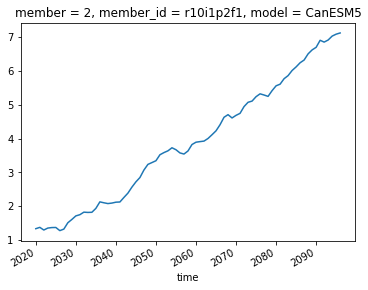

In [28]:
data.isel(model=2,member=2).plot()

In [112]:
dataset[variable] = data 

In [113]:
dataset

<xarray.Dataset>
Dimensions:    (time: 86, member: 58, model: 7)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (member, model) object 1.0 'r4i1p1f1' 'r17i1p1f1' ... nan nan nan
  * model      (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'
Data variables:
    pr_ref     float32 3.81e-05
    pr         (time, member, model) float32 nan nan nan nan ... nan nan nan nan

In [56]:
def compute_modelLE(data):
    ensemble_mean = data.mean('member')
    model = ensemble_mean.var('model')
    
    return model

In [114]:
dataset['model_le'] = compute_modelLE(data=dataset[variable])

In [58]:
def compute_internalLE(data):
    internal = data.var('member')
    internal = internal.mean(dim='model')
    return internal

In [115]:
dataset['internal_le'] = compute_internalLE(data=dataset[variable])

In [61]:
def compute_total_uncertainty(internal,model):
    total = internal + model
    return total

In [116]:
dataset['total_le'] = compute_total_uncertainty(internal=dataset['internal_le'],model=dataset['model_le'])

In [64]:
def compute_total_direct(data):
    total_direct = data.var(dim=('model','member'))
    return total_direct

In [68]:
def compute_percent_contribution(internal,model,total):
    internal_percent = ((internal/total)*100)
    model_percent = ((model/total)*100)
    return internal_percent,model_percent

In [117]:
dataset['total_direct_le'] = compute_total_direct(data=dataset[variable])

In [118]:
dataset['internal_le_frac'],dataset['model_le_frac'] = compute_percent_contribution(internal=dataset['internal_le'],
                                                                                    model=dataset['model_le'],
                                                                                    total = dataset['total_le'])

In [119]:
dataset

<xarray.Dataset>
Dimensions:           (time: 86, member: 58, model: 7)
Coordinates:
  * time              (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member            (member) int64 0 1 2 3 4 5 6 7 ... 50 51 52 53 54 55 56 57
    member_id         (member, model) object 1.0 'r4i1p1f1' ... nan nan
  * model             (model) <U13 'cesm_lens' ... 'MPI-ESM1-2-LR'
Data variables:
    pr_ref            float32 3.81e-05
    pr                (time, member, model) float32 nan nan nan ... nan nan nan
    model_le          (time) float32 nan nan nan nan nan ... nan nan nan nan
    internal_le       (time) float32 nan nan nan nan nan ... nan nan nan nan
    total_le          (time) float32 nan nan nan nan nan ... nan nan nan nan
    total_direct_le   (time) float32 nan nan nan nan nan ... nan nan nan nan
    internal_le_frac  (time) float32 nan nan nan nan nan ... nan nan nan nan
    model_le_frac     (time) float32 nan nan nan nan nan ... nan nan nan nan

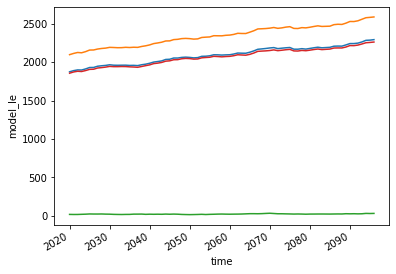

In [120]:
dataset.total_le.plot()
dataset.total_direct_le.plot()
dataset.internal_le.plot()
dataset.model_le.plot()

In [121]:
def get_fit(data):
    first_member = data.isel(member=0).dropna(dim='time')
    fit = polyfit(first_member)
    return fit

In [79]:
    def polyfit(data):
        """Perform 4th order polynomial fit for ensembles in CESM dataset

        Parameters
        ---------
        data: CESM dataset 

        Returns
        -------
        fit: dataset of CESM fitted data 
        """
        # create X and Y variables for the model fit 
        X = np.arange(len(data.time))    # x variable is length of time
        Y = data.values  # y is the temp data

        # the polynomial fit (4th order)
        Z = np.polyfit(X,Y,4)
        fit = data.copy()

        # calculate the fit using coefs from Z
        for i, m in enumerate(fit.model):
            p = np.poly1d(Z[:,i])
            fit[:, i] = p(X)

        return fit

In [122]:
dataset['fit'] = get_fit(data=dataset[variable])

In [123]:
dataset['fit']

<xarray.DataArray 'fit' (time: 86, model: 7)>
array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [-9.98969345e+01,  3.66920815e+01,  4.30361271e+00,
         1.93657455e+01,  1.49836664e+01,  4.23892403e+01,
        -2.00243831e+00],
       [-9.98971024e+01,  3.73853912e+01,  3.80506206e+00,
         1.78741150e+01,  1.45923576e+01,  4.26256104e+01,
...
         3.15598049e+01,  1.25332823e+01,  5.66290092e+01,
         1.10747156e+01],
       [-9.98774414e+01,  4.57116928e+01,  1.11284714e+01,
         3.27288628e+01,  1.21242056e+01,  5.78527527e+01,
         1.09327135e+01],
       [-9.98772964e+01,  4.53009949e+01,  1.05103521e+01,
         3.40316963e+01,  1.16836119e+01,  5.91657524e+01,
         1.07822723e+01],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * model    (model) <U13 'cesm_lens' 'ACCESS-ESM1-5' ... 'MPI-ESM1-2-LR'

In [84]:
def compute_internalFIT(data,fit):
    residual = data - fit
    internal = residual.var('time').mean()
    return internal
    

In [124]:
dataset['internal_fit'] = compute_internalFIT(data=dataset[variable].isel(member=0),
                                              fit = dataset['fit'])

In [87]:
def compute_modelFIT(fit):
    model = fit.var('model')
    return model

In [125]:
dataset['model_fit'] = compute_modelFIT(fit=dataset['fit'])

In [126]:
dataset['total_fit'] = compute_total_uncertainty(internal=dataset['internal_fit'],model=dataset['model_fit'])

In [127]:
dataset['model_fit_frac'],dataset['internal_fit_frac'] = compute_percent_contribution(internal=dataset['internal_fit'],
                                                                                      model=dataset['model_fit'],
                                                                                      total = dataset['total_fit'])

In [92]:
def compute_totaldirect_fit(data):
    total_direct = data.var('model')
    return total_direct

In [128]:
dataset['total_direct_fit'] = compute_totaldirect_fit(data=dataset[variable].isel(member=0))

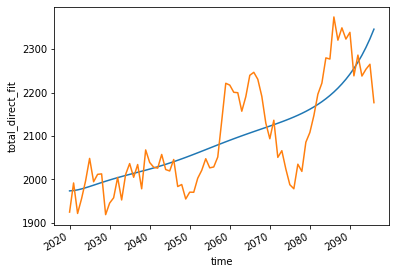

In [129]:
dataset.total_fit.plot()
dataset.total_direct_fit.plot()

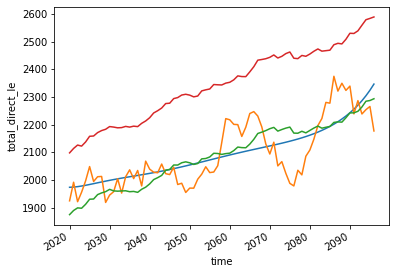

In [130]:
dataset.total_fit.plot()
dataset.total_direct_fit.plot()
dataset.total_le.plot()
dataset.total_direct_le.plot()

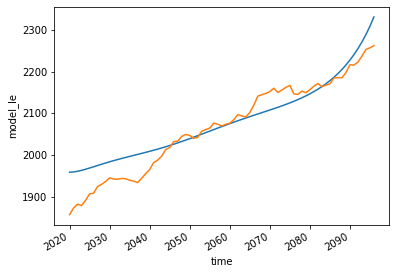

In [131]:
dataset.model_fit.plot()
dataset.model_le.plot()

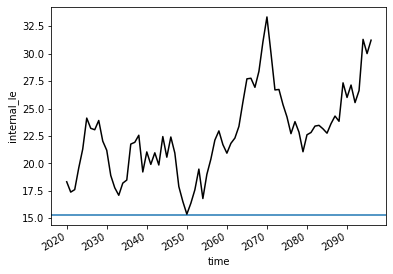

In [132]:
plt.axhline(dataset.internal_fit)
dataset.internal_le.plot(color='k')

In [23]:
def polyfit(data):
    """Perform 4th order polynomial fit for ensembles in CESM dataset
    
    Parameters
    ---------
    data: CESM dataset 
    
    Returns
    -------
    fit: dataset of CESM fitted data 
    """
    # create X and Y variables for the model fit 
    X = np.arange(len(data.time))    # x variable is length of time
    Y = data.values  # y is the temp data
    
    # the polynomial fit (4th order)
    Z = np.polyfit(X,Y,4)
    fit = data.copy()
    
    # calculate the fit using coefs from Z
    for i, m in enumerate(fit.model):
        p = np.poly1d(Z[:,i])
        fit[:, i] = p(X)
    
    return fit


In [2]:
# test methods 

ACCESS = LargeEnsemble(model_name='ACCESS-ESM1-5', variable='tas', granularity='Day', lat=41.3, lon=-72.5, 
                          bucket='climateai_data_repository', path='tmp/internal_variability',load=False);

IndexError: list index out of range

#### stepwise CESM-LENS

In [3]:
url = "https://raw.githubusercontent.com/NCAR/cesm-lens-aws/main/intake-catalogs/aws-cesm1-le.json"
raw_cat = intake.open_esm_datastore(url)

In [13]:
# testing if statements 
variable = 'tas'
# variable = 'pr'

# granularity = 'Amon'
granularity = 'day'


In [14]:
# Define a query for temperature 
if granularity == "Amon":
    frequency = 'monthly'
elif granularity == "day":
    frequency = 'daily'
    
if variable == 'tas':
    cat = raw_cat.search(
        experiment=['RCP85','20C'],
        variable=['TREFHT'],
        frequency=frequency 
    )

elif variable == 'pr':
    cat = raw_cat.search(
        experiment=['RCP85','20C'],
        variable=['PRECL'],
        frequency=frequency 
    )
    

In [15]:
cat.df

,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,TREFHT,reference height temperature,atm,20C,daily,1.0,global,K,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-TREFH...
1,TREFHT,reference height temperature,atm,RCP85,daily,1.0,global,K,2006-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-RCP85-TRE...


In [16]:
# load data into xarray datasets
dset = cat.to_dataset_dict(zarr_kwargs={'consolidated':True}, storage_options={"anon": True});


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


In [17]:
keys = sorted(dset.keys())

In [18]:
keys

['atm.20C.daily', 'atm.RCP85.daily']

In [19]:
hist = dset[keys[0]]
future = dset[keys[1]]

In [20]:
future

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 34675, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(17338, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 576, 192, 288), meta=np.ndarray>
Attributes: (12/14)
    Conventions:               CF-1.0
    NCO:                       4.4.2
    Version:                   $Name$
    host:                      tcs-f02n07
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.105.cam.i.2006-01-...
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TREFHT']
    intake_esm_dataset_key:    atm.RCP85.daily

In [21]:
lat=41.3
lon=-72.5

In [23]:
lon = lon % 360
lon

287.5

In [24]:
hist = hist.sel(lat=lat,lon=lon,method='nearest')
future = future.sel(lat=lat,lon=lon,method='nearest')

In [25]:
hist

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 31390, nbnd: 2)
Coordinates:
    lat        float64 40.99
    lon        float64 287.5
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 1920-01-01 12:00:00 ... 2005-12-31 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(15695, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (member_id, time) float32 dask.array<chunksize=(1, 576), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.4.2
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TREFHT']
    intake_esm_dataset_key:    atm.20C.daily

In [30]:
hist = hist.chunk({'member_id': 1, 'time': -1})
future = future.chunk({'member_id': 1, 'time': -1})

CPU times: user 9.99 ms, sys: 461 µs, total: 10.5 ms
Wall time: 9.79 ms


In [28]:
future

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 34675, nbnd: 2)
Coordinates:
    lat        float64 40.99
    lon        float64 287.5
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(34675, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (member_id, time) float32 dask.array<chunksize=(1, 34675), meta=np.ndarray>
Attributes: (12/14)
    Conventions:               CF-1.0
    NCO:                       4.4.2
    Version:                   $Name$
    host:                      tcs-f02n07
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.105.cam.i.2006-01-...
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TREFHT']
    intake_esm_dataset_key:    atm.RCP85.daily

In [33]:
%%time
hist = hist.load()
future = future.load()

KeyboardInterrupt: 

In [32]:
if hist.lon > 180 or hist.lon < -180:
    # convert lon from 0-360 to -180 to 180
    hist = hist.assign_coords(lon=((hist.lon + 180) % 360 - 180))
else: 
    pass 

if future.lon > 180 or future.lon < -180:
    # convert lon from 0-360 to -180 to 180
    future = future.assign_coords(lon=((future.lon + 180) % 360 - 180))
else: 
    pass 

In [54]:
hist = drop_bounds_height(hist)
future = drop_bounds_height(future)

In [55]:
hist

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 1032)
Coordinates:
    lat        float64 40.99
    lon        float64 -72.5
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) object 1920-01-16 12:00:00 ... 2005-12-16 12:00:00
Data variables:
    TREFHT     (member_id, time) float32 273.7 273.9 279.5 ... 289.6 282.4 274.0
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TREFHT']
    intake_esm_dataset_key:    atm.20C.monthly

In [56]:
hist = convert_calendar(ds=hist,granularity='monthly')
future = convert_calendar(ds=future,granularity='monthly')

In [57]:
future = future.rename_vars({'TREFHT':'tas'})
hist = hist.rename_vars({'TREFHT':'tas'})

In [58]:
# concat and slice to cmip conventions 
CESM = xr.concat(
    [hist, future], dim='time'
)

In [59]:
CESM

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 2172)
Coordinates:
    lat        float64 40.99
    lon        float64 -72.5
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) datetime64[ns] 1920-01-01 1920-02-01 ... 2100-12-01
Data variables:
    tas        (member_id, time) float32 273.7 273.9 279.5 ... 295.8 287.9 282.3
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TREFHT']
    intake_esm_dataset_key:    atm.20C.monthly

In [61]:
hist = CESM.sel(time=slice('1920','2014'))
future = CESM.sel(time=slice('2015','2100'))

In [63]:
future

<xarray.Dataset>
Dimensions:    (member_id: 40, time: 1032)
Coordinates:
    lat        float64 40.99
    lon        float64 -72.5
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2100-12-01
Data variables:
    tas        (member_id, time) float32 275.2 278.2 282.4 ... 295.8 287.9 282.3
Attributes: (12/13)
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    important_note:            This data is part of the project 'Blind Evalua...
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    logname:                   mudryk
    ...                        ...
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET
    topography_file:           /scratch/p/pjk/mudryk/cesm1_1_2_LENS/inputdata...
    intake_esm_varname:        ['TREFHT']
    intake_esm_dataset_key:    atm.20C.monthly

### stepwise CMIP6

In [2]:
url = 'https://storage.googleapis.com/cmip6/pangeo-cmip6.json'
raw_cat = intake.open_esm_datastore(url)

In [3]:
cat = raw_cat.search(
    experiment_id=['historical','ssp585'],
    variable_id='tas',
    table_id = 'day',
    source_id ='EC-Earth3'
)

In [4]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r6i1p1f1,day,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
1,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r9i1p1f1,day,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
2,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r9i1p1f1,day,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20200201
3,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp585,r11i1p1f1,day,tas,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200201
4,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r6i1p1f1,day,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20200201
...,...,...,...,...,...,...,...,...,...,...,...
124,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r17i1p1f1,day,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210120
125,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r18i1p1f1,day,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210121
126,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r21i1p1f1,day,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210223
127,CMIP,EC-Earth-Consortium,EC-Earth3,historical,r19i1p1f1,day,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210305


In [5]:
# load data into xarray datasets
dset = cat.to_dataset_dict(zarr_kwargs={'consolidated':True}, storage_options={"anon": True});


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [6]:
keys = sorted(dset.keys())

In [7]:
keys

['CMIP.EC-Earth-Consortium.EC-Earth3.historical.day.gr',
 'ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.day.gr']

In [8]:
hist = dset[keys[0]]
future = dset[keys[1]]


In [9]:
future


<xarray.Dataset>
Dimensions:    (lat: 258, bnds: 2, lon: 512, member_id: 58, time: 31411)
Coordinates:
  * lat        (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
    height     float64 ...
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(258, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(512, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(15706, 2), meta=np.ndarray>
  * member_id  (member_id) <U10 'r6i1p1f1' 'r9i1p1f1' ... 'r4i1p1f1' 'r3i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 128, 258, 512), meta=np.ndarray>
Attributes: (12/49)
    tracking_id:                        hdl:21.14100/ed849c9f-aeef-4f90-84e0-...
    activity_id:                        ScenarioMIP
    status:                             2021-07-04;created; by gcs.cmip6.ldeo...
    institution_id:                     EC-Earth-Consortium
    parent_variant_label:               r3i1p1f1
    cmor_version:                       3.4.0
    ...                                 ...
    branch_time_in_child:               0.0
    branch_time_in_parent:              60265
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    license:                            CMIP6 model data produced by EC-Earth...
    mip_era:                            CMIP6
    intake_esm_dataset_key:             ScenarioMIP.EC-Earth-Consortium.EC-Ea...

In [10]:
lat=41.3
lon=-72.5

In [11]:
lon = lon % 360
lon

287.5

In [12]:
hist = hist.sel(lat=lat,lon=lon,method='nearest')
future = future.sel(lat=lat,lon=lon,method='nearest')

In [13]:
hist

<xarray.Dataset>
Dimensions:    (time: 60266, bnds: 2, member_id: 71)
Coordinates:
    lat        float64 41.05
  * time       (time) datetime64[ns] 1849-12-31T12:00:00 ... 2014-12-31T12:00:00
    height     float64 ...
    lat_bnds   (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon        float64 287.6
    lon_bnds   (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(30134, 1), meta=np.ndarray>
  * member_id  (member_id) <U10 'r9i1p1f1' 'r6i1p1f1' ... 'r19i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time) float32 dask.array<chunksize=(1, 128), meta=np.ndarray>
Attributes: (12/53)
    parent_sub_experiment_id:  no parent
    tracking_id:               hdl:21.14100/d9ea1270-5c70-4409-ac67-860bb3eda...
    activity_id:               CMIP
    status:                    2021-07-13;created; by gcs.cmip6.ldeo@gmail.com
    institution_id:            EC-Earth-Consortium
    parent_variant_label:      r1i1p1f1
    ...                        ...
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
    branch_time_in_child:      0.0
    institution:               AEMET, Spain; BSC, Spain; CNR-ISAC, Italy; DMI...
    license:                   CMIP6 model data produced by EC-Earth-Consorti...
    mip_era:                   CMIP6
    intake_esm_dataset_key:    CMIP.EC-Earth-Consortium.EC-Earth3.historical....

In [14]:
hist = hist.chunk({'member_id': 1, 'time': -1})
future = future.chunk({'member_id': 1, 'time': -1})

In [16]:
future

<xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 58, time: 31411)
Coordinates:
    lat        float64 41.05
    height     float64 ...
    lat_bnds   (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon        float64 287.6
    lon_bnds   (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31411, 2), meta=np.ndarray>
  * member_id  (member_id) <U10 'r6i1p1f1' 'r9i1p1f1' ... 'r4i1p1f1' 'r3i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time) float32 dask.array<chunksize=(1, 31411), meta=np.ndarray>
Attributes: (12/49)
    tracking_id:                        hdl:21.14100/ed849c9f-aeef-4f90-84e0-...
    activity_id:                        ScenarioMIP
    status:                             2021-07-04;created; by gcs.cmip6.ldeo...
    institution_id:                     EC-Earth-Consortium
    parent_variant_label:               r3i1p1f1
    cmor_version:                       3.4.0
    ...                                 ...
    branch_time_in_child:               0.0
    branch_time_in_parent:              60265
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    license:                            CMIP6 model data produced by EC-Earth...
    mip_era:                            CMIP6
    intake_esm_dataset_key:             ScenarioMIP.EC-Earth-Consortium.EC-Ea...

In [ ]:
hist = hist.load()
future = future.load()

In [22]:
hist

<xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 50, time: 60225)
Coordinates:
    height     float64 2.0
    lat        float64 40.46
    lat_bnds   (bnds) float64 39.07 41.86
    lon        float64 286.9
    lon_bnds   (bnds) float64 285.5 288.3
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) <U9 'r10i1p2f1' 'r11i1p1f1' ... 'r6i1p2f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time) float32 275.3 278.2 275.6 ... 272.9 273.3 272.0
Attributes: (12/49)
    contact:                    ec.cccma.info-info.ccmac.ec@canada.ca
    parent_activity_id:         CMIP
    institution_id:             CCCma
    sub_experiment_id:          none
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    activity_id:                CMIP
    ...                         ...
    CCCma_model_hash:           Unknown
    institution:                Canadian Centre for Climate Modelling and Ana...
    grid_label:                 gn
    parent_experiment_id:       piControl
    parent_mip_era:             CMIP6
    intake_esm_dataset_key:     CMIP.CCCma.CanESM5.historical.day.gn

In [23]:
if hist.lon > 180 or hist.lon < -180:
    # convert lon from 0-360 to -180 to 180
    hist = hist.assign_coords(lon=((hist.lon + 180) % 360 - 180))
else: 
    pass 

if future.lon > 180 or future.lon < -180:
    # convert lon from 0-360 to -180 to 180
    future = future.assign_coords(lon=((future.lon + 180) % 360 - 180))
else: 
    pass 

In [24]:
future

<xarray.Dataset>
Dimensions:    (time: 60590, bnds: 2, member_id: 50)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2180-12-31 12:00:00
    height     float64 2.0
    lat        float64 40.46
    lat_bnds   (bnds) float64 39.07 41.86
    lon        float64 -73.12
    lon_bnds   (bnds) float64 285.5 288.3
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... nan
  * member_id  (member_id) <U9 'r16i1p2f1' 'r10i1p1f1' ... 'r5i1p1f1' 'r5i1p2f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time) float32 281.6 288.1 282.3 277.1 ... nan nan nan
Attributes: (12/48)
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    parent_activity_id:          CMIP
    institution_id:              CCCma
    sub_experiment_id:           none
    activity_id:                 ScenarioMIP
    branch_method:               Spin-up documentation
    ...                          ...
    Conventions:                 CF-1.7 CMIP-6.2
    institution:                 Canadian Centre for Climate Modelling and An...
    grid_label:                  gn
    parent_experiment_id:        historical
    parent_mip_era:              CMIP6
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp585.day.gn

In [25]:
def drop_bounds_height(ds):
        
    """Drop coordinates like 'time_bounds' from datasets,
    which can lead to issues when merging."""
    drop_vars = [vname for vname in ds.coords
            if (('_bounds') in vname ) or ('_bnds') in vname or ('height') in vname]
    return ds.drop(drop_vars)

In [26]:
hist = drop_bounds_height(hist)
future = drop_bounds_height(future)

In [27]:
future

<xarray.Dataset>
Dimensions:    (time: 60590, member_id: 50)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2180-12-31 12:00:00
    lat        float64 40.46
    lon        float64 -73.12
  * member_id  (member_id) <U9 'r16i1p2f1' 'r10i1p1f1' ... 'r5i1p1f1' 'r5i1p2f1'
Data variables:
    tas        (member_id, time) float32 281.6 288.1 282.3 277.1 ... nan nan nan
Attributes: (12/48)
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    parent_activity_id:          CMIP
    institution_id:              CCCma
    sub_experiment_id:           none
    activity_id:                 ScenarioMIP
    branch_method:               Spin-up documentation
    ...                          ...
    Conventions:                 CF-1.7 CMIP-6.2
    institution:                 Canadian Centre for Climate Modelling and An...
    grid_label:                  gn
    parent_experiment_id:        historical
    parent_mip_era:              CMIP6
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp585.day.gn

In [28]:
future = future.sel(time=slice('2015','2100'))

In [29]:
hist = hist.sel(time=slice('1920','2005'))

In [30]:
future

<xarray.Dataset>
Dimensions:    (time: 31390, member_id: 50)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    lat        float64 40.46
    lon        float64 -73.12
  * member_id  (member_id) <U9 'r16i1p2f1' 'r10i1p1f1' ... 'r5i1p1f1' 'r5i1p2f1'
Data variables:
    tas        (member_id, time) float32 281.6 288.1 282.3 ... 282.8 284.2 283.9
Attributes: (12/48)
    contact:                     ec.cccma.info-info.ccmac.ec@canada.ca
    parent_activity_id:          CMIP
    institution_id:              CCCma
    sub_experiment_id:           none
    activity_id:                 ScenarioMIP
    branch_method:               Spin-up documentation
    ...                          ...
    Conventions:                 CF-1.7 CMIP-6.2
    institution:                 Canadian Centre for Climate Modelling and An...
    grid_label:                  gn
    parent_experiment_id:        historical
    parent_mip_era:              CMIP6
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp585.day.gn

In [31]:
hist = convert_calendar(ds=hist,granularity='daily')
future = convert_calendar(ds=future,granularity='daily')

In [32]:
hist

<xarray.Dataset>
Dimensions:    (member_id: 50, time: 31390)
Coordinates:
    lat        float64 40.46
    lon        float64 -73.12
  * time       (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2005-12-31
  * member_id  (member_id) <U9 'r10i1p2f1' 'r11i1p1f1' ... 'r6i1p2f1'
Data variables:
    tas        (member_id, time) float32 278.3 276.8 270.8 ... 286.2 280.7 276.6
Attributes: (12/49)
    contact:                    ec.cccma.info-info.ccmac.ec@canada.ca
    parent_activity_id:         CMIP
    institution_id:             CCCma
    sub_experiment_id:          none
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    activity_id:                CMIP
    ...                         ...
    CCCma_model_hash:           Unknown
    institution:                Canadian Centre for Climate Modelling and Ana...
    grid_label:                 gn
    parent_experiment_id:       piControl
    parent_mip_era:             CMIP6
    intake_esm_dataset_key:     CMIP.CCCma.CanESM5.historical.day.gn

In [27]:
future

<xarray.Dataset>
Dimensions:    (member_id: 58, time: 1032)
Coordinates:
    lat        float64 41.05
    lon        float64 -72.42
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2100-12-01
  * member_id  (member_id) <U10 'r6i1p1f1' 'r9i1p1f1' ... 'r4i1p1f1' 'r3i1p1f1'
Data variables:
    tas        (member_id, time) float32 272.9 272.5 275.4 ... 295.4 287.5 286.6
Attributes: (12/49)
    branch_time_in_child:               0.0
    sub_experiment:                     none
    latest_applied_cmor_fixer_version:  v3.0
    NCO:                                netCDF Operators version 4.9.2 (Homep...
    branch_time:                        0.0
    sub_experiment_id:                  none
    ...                                 ...
    intake_esm_varname:                 ['tas']
    activity_id:                        ScenarioMIP
    parent_activity_id:                 CMIP
    branch_time_in_parent:              60265
    parent_mip_era:                     CMIP6
    intake_esm_dataset_key:             ScenarioMIP.EC-Earth-Consortium.EC-Ea...

In [ ]:
hist_models = []
future_models = []
for model in mmle.models:
    hist = mmle.le_dict[model].hist
    hist = hist.drop(['lat','lon'])
    hist = hist.assign_coords(model=model)
    hist = hist.expand_dims('model')
    member_number = np.arange(0,len(hist.member_id),1)
    hist = hist.assign_coords({'member_number':member_number})
    hist['tas'] = hist.tas.swap_dims({'member_id':'member_number'})
    hist['member_id'] = hist.member_id.swap_dims({'member_id':'member_number'})
    hist_models.append(hist)
    
    future = mmle.le_dict[model].future
    future = future.drop(['lat','lon'])
    future = future.assign_coords(model=model)
    future = future.expand_dims('model')
    member_number = np.arange(0,len(future.member_id),1)
    future = future.assign_coords({'member_number':member_number})
    future['tas'] = future.tas.swap_dims({'member_id':'member_number'})
    future['member_id'] = future.member_id.swap_dims({'member_id':'member_number'})
    future_models.append(future)
future = xr.concat(future_models,dim='model')
hist = xr.concat(hist_models,dim='model')

In [26]:
hist.to_zarr(
            f'gcs://climateai_data_repository/tmp/internal_variability/test2.zarr',
            consolidated=True,
            mode='w'
        )

### chunking things and trying to save


In [14]:
chunks = {'time':1}

In [15]:
        # ds.chunk(chunks).to_zarr(
        #     path,
        #     consolidated=True,
        #     mode='w' if self.overwrite else 'w-'
        # )

In [16]:
hist = hist.chunk(chunks)
future = future.chunk(chunks)

In [ ]:
hist

In [18]:
hist.to_zarr(store=f'gcs://climateai_data_repository/tmp/internal_variability/test.zarr',
             consolidated=True,mode='w')

KeyboardInterrupt: 

### Stephan stuff

In [62]:
hist

<xarray.Dataset>
Dimensions:    (time: 1981, bnds: 2, member_id: 73)
Coordinates:
    lat        float64 40.35
  * time       (time) datetime64[ns] 1849-12-16T12:00:00 ... 2014-12-16T12:00:00
    height     float64 ...
    lat_bnds   (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon        float64 70.31
    lon_bnds   (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(283, 2), meta=np.ndarray>
  * member_id  (member_id) <U10 'r9i1p1f1' 'r11i1p1f1' ... 'r25i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    tas        (member_id, time) float32 dask.array<chunksize=(1, 283), meta=np.ndarray>
Attributes: (12/55)
    table_id:                  Amon
    parent_activity_id:        CMIP
    status:                    2021-10-07;created; by gcs.cmip6.ldeo@gmail.com
    creation_date:             2019-03-12T20:54:42Z
    experiment_id:             historical
    NCO:                       4.7.2
    ...                        ...
    tracking_id:               hdl:21.14100/1959ae44-b6dd-4975-aae3-36f6e6157...
    variable_id:               tas
    variant_info:              forcing: Nat.Ant. Member generated from autosu...
    forcing_index:             1
    comment:                   This experiment is part of SMHI's Large Ensemb...
    intake_esm_dataset_key:    CMIP.EC-Earth-Consortium.EC-Earth3.historical....

In [3]:
cat = raw_cat.search(
    experiment_id='ssp585',
    variable_id='tas',
    table_id='Amon'
)

In [11]:
cat.df.nunique()

activity_id         1
institution_id     31
source_id          47
experiment_id       1
member_id         146
table_id            1
variable_id         1
grid_label          3
zstore            326
dcpp_init_year      0
version            71
dtype: int64

In [24]:
cat.df.groupby('source_id').member_id.count()

source_id
ACCESS-CM2           5
ACCESS-ESM1-5       35
AWI-CM-1-1-MR        1
BCC-CSM2-MR          1
CAMS-CSM1-0          2
CAS-ESM2-0           2
CESM2                3
CESM2-WACCM          5
CIESM                1
CMCC-CM2-SR5         1
CMCC-ESM2            1
CNRM-CM6-1           6
CNRM-CM6-1-HR        1
CNRM-ESM2-1          5
CanESM5             50
CanESM5-CanOE        3
E3SM-1-1             1
EC-Earth3           58
EC-Earth3-CC         1
EC-Earth3-Veg        8
EC-Earth3-Veg-LR     3
FGOALS-f3-L          1
FGOALS-g3            4
FIO-ESM-2-0          3
GFDL-CM4             1
GFDL-ESM4            1
GISS-E2-1-G         10
GISS-E2-1-H          4
HadGEM3-GC31-LL      4
HadGEM3-GC31-MM      4
IITM-ESM             1
INM-CM4-8            1
INM-CM5-0            1
IPSL-CM6A-LR         6
KACE-1-0-G           3
KIOST-ESM            1
MCM-UA-1-0           1
MIROC-ES2L           9
MIROC6              50
MPI-ESM1-2-HR        2
MPI-ESM1-2-LR       10
MRI-ESM2-0           6
NESM3                2
N

6 models with 10+ emsemble members for monthly. This is great, especially if we can also add CESM-LENS. Not quite the ensemble sizes from MMLEA, so there might be a worry that for extremes the sample is too low but that remains to be seen. 

Let's now check whether this is the same for daily data.

In [32]:
cat = raw_cat.search(
    experiment_id='ssp585',
    variable_id='tasmax',
    table_id='day'
)

In [33]:
cat.df.nunique()

activity_id         1
institution_id     24
source_id          34
experiment_id       1
member_id         128
table_id            1
variable_id         1
grid_label          4
zstore            241
dcpp_init_year      0
version            48
dtype: int64

In [34]:
cat.df.groupby('source_id').member_id.count()

source_id
ACCESS-CM2           3
ACCESS-ESM1-5       10
AWI-CM-1-1-MR        1
BCC-CSM2-MR          1
CAMS-CSM1-0          1
CESM2                3
CESM2-WACCM          4
CMCC-ESM2            1
CNRM-CM6-1           1
CNRM-CM6-1-HR        1
CNRM-ESM2-1          1
CanESM5             50
EC-Earth3           58
EC-Earth3-CC         1
EC-Earth3-Veg        8
EC-Earth3-Veg-LR     3
FGOALS-g3            4
GFDL-CM4             2
GFDL-ESM4            1
INM-CM4-8            1
INM-CM5-0            1
IPSL-CM6A-LR         6
KACE-1-0-G           3
KIOST-ESM            1
MIROC-ES2L           1
MIROC6              50
MPI-ESM1-2-HR        2
MPI-ESM1-2-LR       10
MRI-ESM2-0           6
NESM3                2
NorESM2-LM           1
NorESM2-MM           1
TaiESM1              1
UKESM1-0-LL          1
Name: member_id, dtype: int64

Now we only have 5, GISS is missing in daily but that's ok, it only had 10 members anyway. pr, tas, tasmax and tasmin are all the same. This is good news. Hurray for cloud data! 